In [31]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
import cmath
import scipy
import scipy.interpolate as interpolate
import scipy.integrate as integrate
import scipy.special as special
import numpy.ma as ma
#np.set_printoptions(threshold=sys.maxsize)
pts = 5000 # number of iterator steps where neccessary
H_to_K = 1/0.000003166808534191 # conversion of Henries to Kelvin
tol = 1e-6 # tolerance where neccessary

In [325]:
r1 = 4.5 # starting posistion r1 in ao
r2 = 500 # ending posistion r2 in ao
dr1 = 0.01 # step spacing in ao

N1 = int((r2-r1)/dr1) # Number of grid points
ipap = np.arange(1,N1, 1.0) # indexing from the paper, given i = 1,2,...,N-1

r = r1 + dr1*ipap

C12 = 3.05e8 # C12 coefficient in Eh*ao
C6 = 4710 # C6 coefficient in Eh*ao
VLJ = (C12/(r**12)) - (C6/(r**6)) # standard Lennard-Jones interatomic potential

Eo = 3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs

print(f' len(r) = {len(r)}, N1 = {N1}')

 len(r) = 49549, N1 = 49550


# Ground State --- Lennard-Jones
## $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}$, $C_{6} = 4710 E_{h}a_{0}$

## At r = r2, $\psi_{N}(r) = Usin(kr+\delta)$, $\psi_{N}'(r) = Ukcos(kr+\delta)$
## $(\psi_{N}(r))^2 + (\frac{1}{k}\psi_{N}'(r))^2 = U^2$

 N1 = 49550


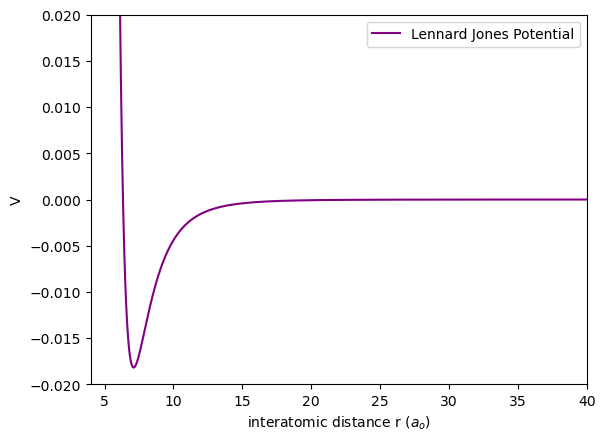

In [330]:
plt.plot(r, VLJ, color = 'purple', label = 'Lennard Jones Potential')
plt.ylabel('V')
plt.xlabel('interatomic distance r $(a_o)$')
plt.legend()
plt.ylim(-0.02,0.02)
plt.xlim(4,40)

print(f' N1 = {N1}')

# Energy Normalization
## $(\psi_{N}(r))^2 + (\frac{1}{k}\psi_{N}'(r))^2 = U^2$
## $\Psi_{E} = \frac{\psi_N}{U}\sqrt{\frac{2\mu}{\pi k}} $

In [332]:
def Numerov(Energy, Num, V_r, dr, grid): # function to find psi(r) continuum state (E>0)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - V_r) # wave number squared for the energy
    ksq_p = 2*mu*Energy

    for i in range(2,Num-1):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
           # print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
           # print(f' the numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])
    Psi_f = psi/max(psi) # divide Psi by its largest value to qvoid it becoming too large
    Psi_prime = np.gradient(Psi_f, grid) # find the derivate over the grid r
    
    # Energy Normalization
    A_term = Psi_f[-1]**2
    B_term = Psi_prime[-1]**2
    B_coef = 1/(ksq[-1])
    U_sq = A_term + B_coef*B_term
    U = np.sqrt(U_sq)
    norm_factor = np.sqrt((2*mu)*(1/(np.pi*np.sqrt(ksq[-1]))))
    print((U,norm_factor))
    
    Psi_Energy_Normalized = (1/U)*(Psi_f)*norm_factor
    
        
    return Psi_Energy_Normalized

(40.08002791978919, 8213.665773809988)


(4.0, 499.99)

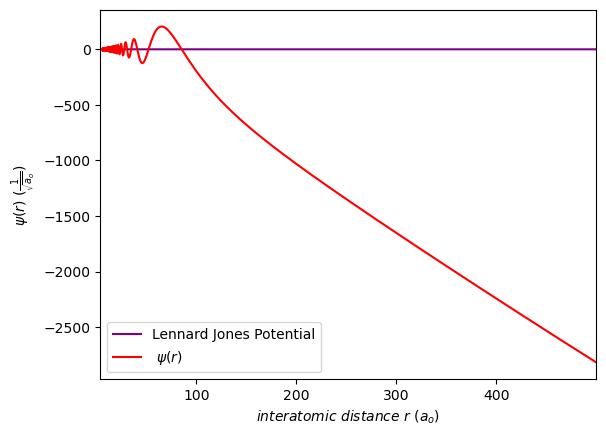

In [333]:
VLJ = (C12/(r**12)) - (C6/(r**6))
psi = np.zeros(N1-1)  # initializing psi(r) as array of zeros
Psi_1 = Numerov(Eo, N1, VLJ, dr1, r) # wave function Psi
#plt.plot(r, Psi_1, label = f' $\\psi(r)$', color = 'red') 
plt.plot(r, VLJ, color = 'purple', label = 'Lennard Jones Potential')


#psi_1prime = np.gradient(Psi_1, r) # first posistion derivate of wave function Psi
plt.plot(r, Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

#plt.ylim(-0.02,0.045)
#plt.ylim(-0.001,0.001)
plt.xlim(4,max(r))

(8213.665773764847, 8213.665773809988)
0.0007350868734072235


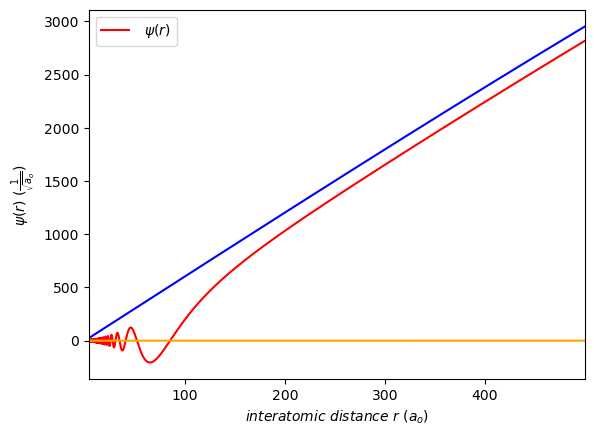

In [345]:
plt.plot(r, -1*Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

#plt.ylim(-0.02,0.045)
#plt.ylim(-0.001,0.001)
plt.xlim(4,max(r))

V_r2 = VLJ[-1]
kp = np.sqrt((2*mu)*(Eo - V_r2))
Psi_prime = np.gradient(Psi_1, r)
Factor = np.sqrt((2*mu)*(1/(np.pi*kp)))
A = Psi_1[-1]
B = Psi_prime[-1]
U = np.sqrt(A**2 + ((1/kp)*B)**2)
print((U, Factor))
Psi_EEE = (1/U)*np.sin(kp*r)*Factor
print(kp)


plt.plot(r, Psi_EEE, color = 'orange')


sinkr = Factor*np.sin(kp*r)
plt.plot(r, sinkr, color = 'blue')

In [347]:
Delta = np.arctan((kp*Psi_1[-1])/(Psi_prime[-1])) - (kp*r[-1])
print(Delta)

-0.017456619245454885


## $\delta = tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) - kr $

(8213.665773764847, 8213.665773809988)
0.0007350868734072235


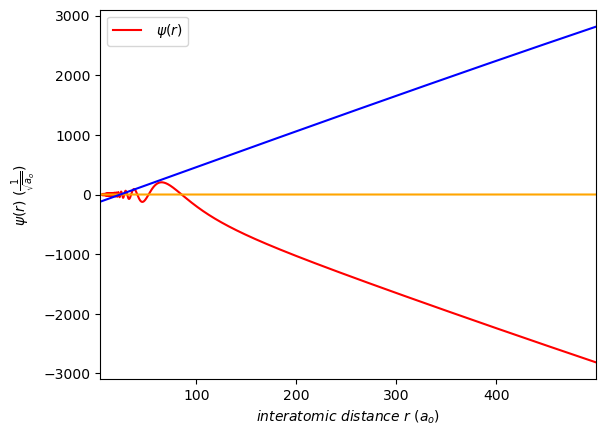

In [339]:
plt.plot(r, -1*Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

#plt.ylim(-0.02,0.045)
#plt.ylim(-0.001,0.001)
plt.xlim(4,max(r))

V_r2 = VLJ[-1]
kp = np.sqrt((2*mu)*(Eo - V_r2))
Psi_prime = np.gradient(Psi_1, r)
Factor = np.sqrt((2*mu)*(1/(np.pi*kp)))
A = Psi_1[-1]
B = Psi_prime[-1]
U = np.sqrt(A**2 + ((1/kp)*B)**2)
print((U, Factor))
Psi_EEE = (1/U)*np.sin(kp*r)*Factor
print(kp)


plt.plot(r, Psi_EEE, color = 'orange')


sinkr = Factor*np.sin(kp*r + Delta)
plt.plot(r, sinkr, color = 'blue')